In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [10]:
df_world = pd.read_csv('Headlines - World.csv')

In [11]:
df_world

,headline,section_name,year,month,year_group,decade,compound,neg,neu,pos,score
0,The U.S. reaches 20 million cases.,World,2021.0,1.0,9,5,0.0516,0.000,0.806,0.194,positive
1,Florida health officials detect the state’s fi...,World,2021.0,1.0,9,5,0.0000,0.000,1.000,0.000,neutral
2,An Embattled Public Servant in a Fractured France,World,2021.0,1.0,9,5,0.0000,0.000,1.000,0.000,neutral
3,What to Know as Troubled Afghan Peace Talks En...,World,2021.0,1.0,9,5,0.1280,0.182,0.606,0.212,positive
4,France couldn’t stop the New Year’s parties. O...,World,2021.0,1.0,9,5,-0.2023,0.212,0.660,0.127,negative
...,...,...,...,...,...,...,...,...,...,...,...
297490,POLAND REPORTS A SHORTAGE IN FOOD SET ASIDE FO...,World,1981.0,12.0,1,1,-0.2500,0.182,0.818,0.000,negative
297491,IRAQ REPORTS ISRAELI AIRCRAFT INTRUDED INTO IT...,World,1981.0,12.0,1,1,0.0000,0.000,1.000,0.000,neutral
297492,"25,000 POLES IN THE U.S. ARE TRYING TO GET HOME",World,1981.0,12.0,1,1,0.0000,0.000,1.000,0.000,neutral
297493,Around the World; Chile Seals Off 2 Areas In S...,World,1981.0,12.0,1,1,-0.5719,0.252,0.748,0.000,negative


In [12]:
df_world.rename(columns = {'compound':'compound_score'}, inplace = True)
df_world.rename(columns = {'neg':'negative_score'}, inplace = True)
df_world.rename(columns = {'neu':'neutral_score'}, inplace = True)
df_world.rename(columns = {'pos':'positive_score'}, inplace = True)
df_world.rename(columns = {'decade':'decade_group'}, inplace = True)
df_world.rename(columns = {'year':'year_no'}, inplace = True)

df_world = df_world.drop(columns=['score', 'section_name','month'])

In [13]:
df_world.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 297495 entries, 0 to 297494
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   headline        297495 non-null  object 
 1   year_no         297495 non-null  float64
 2   year_group      297495 non-null  int64  
 3   decade_group    297495 non-null  int64  
 4   compound_score  297495 non-null  float64
 5   negative_score  297495 non-null  float64
 6   neutral_score   297495 non-null  float64
 7   positive_score  297495 non-null  float64
dtypes: float64(5), int64(2), object(1)
memory usage: 18.2+ MB


In [14]:
df_world_1=df_world[df_world['year_group']==1].drop(columns=['year_no','year_group','decade_group']).reset_index(drop=True)
df_world_2=df_world[df_world['year_group']==2].drop(columns=['year_no','year_group','decade_group']).reset_index(drop=True)
df_world_3=df_world[df_world['year_group']==3].drop(columns=['year_no','year_group','decade_group']).reset_index(drop=True)
df_world_4=df_world[df_world['year_group']==4].drop(columns=['year_no','year_group','decade_group']).reset_index(drop=True)
df_world_5=df_world[df_world['year_group']==5].drop(columns=['year_no','year_group','decade_group']).reset_index(drop=True)
df_world_6=df_world[df_world['year_group']==6].drop(columns=['year_no','year_group','decade_group']).reset_index(drop=True)
df_world_7=df_world[df_world['year_group']==7].drop(columns=['year_no','year_group','decade_group']).reset_index(drop=True)
df_world_8=df_world[df_world['year_group']==8].drop(columns=['year_no','year_group','decade_group']).reset_index(drop=True)
df_world_9=df_world[df_world['year_group']==9].drop(columns=['year_no','year_group','decade_group']).reset_index(drop=True)

In [15]:
from sklearn.feature_extraction.text import CountVectorizer

In [16]:
#instantiate
bagofwords = CountVectorizer(stop_words="english", max_features=2500)

#fit
bagofwords.fit(df_world['headline'])

#transform
df_world_transformed = bagofwords.transform(df_world['headline'])

df_world_transformed.shape

(297495, 2500)

In [30]:
#turn sparse matrix into array and then df
df_world_vectors = pd.DataFrame(columns = bagofwords.get_feature_names_out(), data = df_world_transformed.toarray())

#final vectorized dfs:
df_world_vectorized = pd.concat([df_world, df_world_vectors], axis=1)

In [ ]:
#df_world_vectorized.to_csv('World_Vectorized.csv', index=False)

In [20]:
#df_world_vectorized = df_world_vectorized[df_world_vectorized.columns.drop(list(df_world_vectorized.filter(regex='\d')))]

In [31]:
df_world_1=df_world_vectorized[df_world_vectorized['year_group']==1].reset_index(drop=True)
df_world_2=df_world_vectorized[df_world_vectorized['year_group']==2].reset_index(drop=True)
df_world_3=df_world_vectorized[df_world_vectorized['year_group']==3].reset_index(drop=True)
df_world_4=df_world_vectorized[df_world_vectorized['year_group']==4].reset_index(drop=True)
df_world_5=df_world_vectorized[df_world_vectorized['year_group']==5].reset_index(drop=True)
df_world_6=df_world_vectorized[df_world_vectorized['year_group']==6].reset_index(drop=True)
df_world_7=df_world_vectorized[df_world_vectorized['year_group']==7].reset_index(drop=True)
df_world_8=df_world_vectorized[df_world_vectorized['year_group']==8].reset_index(drop=True)
df_world_9=df_world_vectorized[df_world_vectorized['year_group']==9].reset_index(drop=True)

In [32]:
#splitting into X & y for coefficient / counting:
X_world_1 = df_world_1.drop(columns=['year_no', 'year_group','decade_group','headline','compound_score','neutral_score','positive_score','negative_score'])
y_world_1 = df_world_1['compound_score']

In [25]:
world_1_neg = df_world_1.sort_values('compound_score', ascending=True).reset_index(drop=True).head(1000)

world_1_counts_neg = pd.DataFrame(
   {"counts": world_1_neg.sum(axis=0)}     
).sort_values("counts", ascending=False)

world_1_counts_neg.head(20)

##possible to create an average compound score or something else for the tokens?

,counts
soviet,1888
says,1627
new,1197
talks,1119
reagan,1080
world,942
today,939
salvador,902
arms,877
israel,827


In [46]:
world_1_pos = df_world_1.sort_values('compound_score', ascending=False).reset_index(drop=True).head(1000)

world_1_counts_pos = pd.DataFrame(
   {"counts": world_1_pos.sum(axis=0)}     
).sort_values("counts", ascending=False)

world_1_counts_pos.head(20)

,counts
1940,1627.0
2205,1119.0
2078,944.0
2264,939.0
1195,827.0
1921,758.0
1310,697.0
1832,648.0
1196,634.0
1786,619.0


In [ ]:
coef_df = pd.DataFrame(
    {"token": X_world_9_bottom.columns, "coefficient": linreg_world_9_bottom.coef_[0]}
).reset_index(drop=True)

coef_df

In [ ]:
word_counts_neg = pd.DataFrame(
    {"counts": X_world_9_bottom.sum(axis=0)},
    index=bagofwords_world_9_bottom.get_feature_names_out()
).sort_values("counts", ascending=False)

In [ ]:
bagofwords.get_feature_names_out()

In [ ]:
from nltk.stem import PorterStemmer

ps = PorterStemmer()

words_abuse = ["abuse", "abuses"]
  
for w in words_abuse:
    print(w, " : ", ps.stem(w))

## Coefficients

In [33]:
y_world_1.shape

(34732,)

In [34]:
X_world_1.shape

(34732, 2500)

In [41]:
# importing scaler
from sklearn.preprocessing import MinMaxScaler

# instantiating model
minmax = MinMaxScaler()

# fitting model 
minmax.fit(X_world_1)

# transforming model
X_world_1 = minmax.transform(X_world_1)

In [42]:
# load Linear Regression model 
from sklearn.linear_model import LinearRegression

# Instantiate model
linreg_world_1 = LinearRegression()

# Fit model on training df
linreg_world_1.fit(X_world_1,y_world_1)

LinearRegression()

In [43]:
word_coefficients = pd.DataFrame(
    {"coefficient": linreg_world_1.coef_[0]},
    index = bagofwords.get_feature_names_out()
).sort_values("coefficient", ascending=False)

word_coefficients

,coefficient
000,-0.01787
posts,-0.01787
portugal,-0.01787
poses,-0.01787
position,-0.01787
...,...
expands,-0.01787
expected,-0.01787
expects,-0.01787
expel,-0.01787


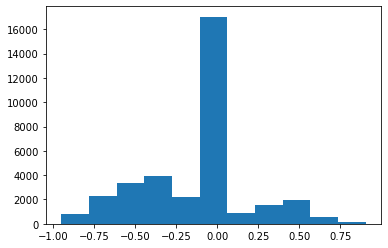

In [45]:
plt.hist(y_world_1, bins=11)
plt.show()

In [ ]:
coef_df = pd.DataFrame(
    {"token": X_world_9_bottom.columns, "coefficient": linreg_world_9_bottom.coef_[0]}
).reset_index(drop=True)

coef_df

In [ ]:
# load Logistic Regression model 
from sklearn.linear_model import LogisticRegression

# Instantiate model 
logreg_world_1 = LogisticRegression(solver='lbfgs', random_state=1, max_iter=1000)

# Fit model on training df
logreg_world_1.fit(X_world_1,y_world_1)

In [ ]:
pd.set_option('display.max_colwidth', None)

In [ ]:
df_world_1

In [ ]:
df_world_1[df_world_1['headline'].str.contains('SAYS')]

In [ ]:
party_df = df_world_1[df_world_1['headline'].str.contains('PARTY')].reset_index(drop=True)

In [ ]:
pip install vaderSentiment

In [ ]:
pip install nltk

In [ ]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

In [ ]:
import nltk 
nltk.download('vader_lexicon')

In [ ]:
analyzer.lexicon.pop('party')

In [ ]:
party_df['compound'] = [analyzer.polarity_scores(x)['compound'] for x in party_df['headline']]
party_df['neg'] = [analyzer.polarity_scores(x)['neg'] for x in party_df['headline']]
party_df['neu'] = [analyzer.polarity_scores(x)['neu'] for x in party_df['headline']]
party_df['pos'] = [analyzer.polarity_scores(x)['pos'] for x in party_df['headline']]

In [ ]:
party_df

In [ ]:
bagofwords.get_feature_names_out()